In [1]:
# use simpful to create a fuzzy controller for the inverted pendulum problem

import gym
import numpy as np
from simpful import *
import matplotlib.pyplot as plt
import time

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



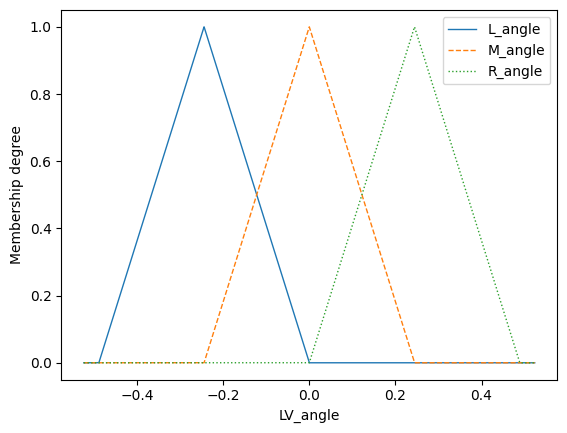

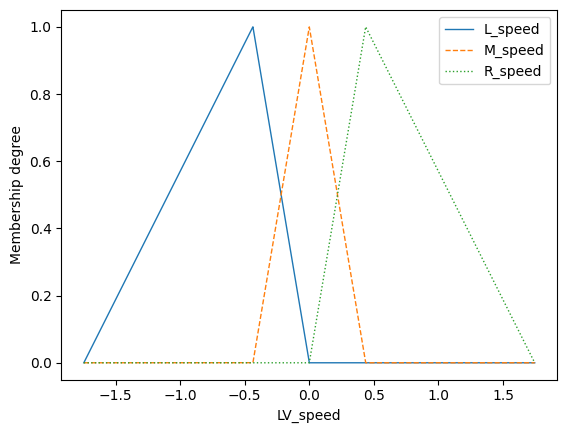

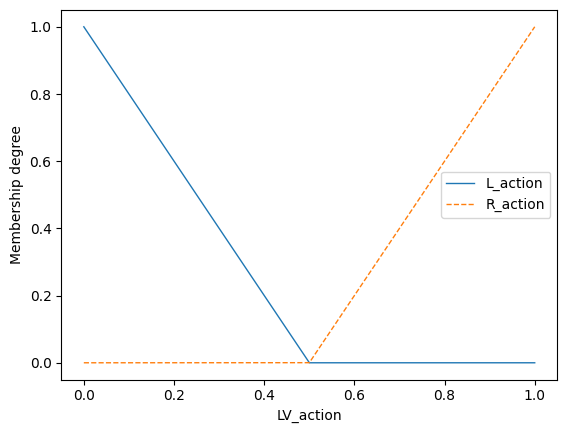

In [2]:
# create the fuzzy system
fs = FuzzySystem()

def rad(x):
    return x * np.pi / 180

# create fuzzy sets and linguistic variables
L_angle = FuzzySet(function=Triangular_MF(a=-rad(28), b=-rad(14), c=0), term="L_angle")
M_angle = FuzzySet(function=Triangular_MF(a=-rad(14), b=0, c=rad(14)), term="M_angle")
R_angle = FuzzySet(function=Triangular_MF(a=0, b=rad(14), c=rad(28)), term="R_angle")
LV_angle = LinguisticVariable([L_angle, M_angle, R_angle], universe_of_discourse=[-rad(30), rad(30)], concept="LV_angle")
fs.add_linguistic_variable("angle", LV_angle)

L_speed = FuzzySet(function=Triangular_MF(a=-rad(100), b=-rad(25), c=0), term="L_speed")
M_speed = FuzzySet(function=Triangular_MF(a=-rad(25), b=0, c=rad(25)), term="M_speed")
R_speed = FuzzySet(function=Triangular_MF(a=0, b=rad(25), c=rad(100)), term="R_speed")
LV_speed = LinguisticVariable([L_speed, M_speed, R_speed], universe_of_discourse=[-rad(100), rad(100)], concept="LV_speed")
fs.add_linguistic_variable("speed", LV_speed)

L_pos = FuzzySet(function=Triangular_MF(a=-3, b=-1.5, c=0), term="L_pos")
R_pos = FuzzySet(function=Triangular_MF(a=0, b=1.5, c=3), term="R_pos")
LV_pos = LinguisticVariable([L_pos, R_pos], universe_of_discourse=[-3, 3], concept="LV_pos")
fs.add_linguistic_variable("pos", LV_pos)


L_action = FuzzySet(function=Triangular_MF(a=-0.5, b=0, c=0.5), term="L_action")
R_action = FuzzySet(function=Triangular_MF(a=0.5, b=1, c=1.5), term="R_action")
LV_action = LinguisticVariable([L_action, R_action], universe_of_discourse=[0, 1], concept="LV_action")
fs.add_linguistic_variable("action", LV_action)

# create fuzzy rules
fs.add_rules([
    "IF (angle IS L_angle) AND ((speed IS L_speed) OR (speed IS M_speed)) THEN (action IS L_action)",
    "IF (angle IS L_angle) AND (speed IS R_speed) THEN (action IS R_action)",
    "IF (angle IS R_angle) AND (speed IS L_speed) THEN (action IS L_action)",
    "IF (angle IS R_angle) AND ((speed IS M_speed) OR (speed IS R_speed)) THEN (action IS R_action)",

    "IF (angle IS M_angle) AND (speed IS L_speed) THEN (action IS L_action)",
    "IF (angle IS M_angle) AND (speed IS R_speed) THEN (action IS R_action)",

    "IF (angle IS M_angle) AND (speed IS M_speed) AND (pos IS L_pos) THEN (action IS R_action)",
    "IF (angle IS M_angle) AND (speed IS M_speed) AND (pos IS R_pos) THEN (action IS L_action)",
    
])

LV_angle.plot()
LV_speed.plot()
LV_action.plot()

In [3]:
# test the fuzzy system
def returnAction(angle, speed, pos):
    fs.set_variable("angle", angle)
    fs.set_variable("speed", speed)
    fs.set_variable("pos", pos)
    return int(round(fs.inference(["action"])["action"],0))

In [6]:
env = gym.make("CartPole-v1", render_mode="human")
observation, info = env.reset(seed=42)
i=0
while (i:=i+1):
    pos, _, angle, speed = observation
    action = returnAction(angle, speed, pos)
    observation, reward, terminated, truncated, info = env.step(action)
    print("Akcja nr ", i, ": ", action, "Nagroda: ", reward, "Obserwacja: ", observation, "Info: ", info)

    if terminated or truncated:
        observation, info = env.reset()

Akcja nr  1 :  1 Nagroda:  1.0 Obserwacja:  [ 0.02727336  0.18847767  0.03625453 -0.26141977] Info:  {}
Akcja nr  2 :  0 Nagroda:  1.0 Obserwacja:  [ 0.03104291 -0.00714255  0.03102613  0.04247424] Info:  {}
Akcja nr  3 :  1 Nagroda:  1.0 Obserwacja:  [ 0.03090006  0.18752107  0.03187562 -0.24026045] Info:  {}
Akcja nr  4 :  0 Nagroda:  1.0 Obserwacja:  [ 0.03465049 -0.00804138  0.02707041  0.06230407] Info:  {}
Akcja nr  5 :  1 Nagroda:  1.0 Obserwacja:  [ 0.03448966  0.1866822   0.02831649 -0.22171655] Info:  {}
Akcja nr  6 :  0 Nagroda:  1.0 Obserwacja:  [ 0.0382233  -0.00883281  0.02388216  0.07976232] Info:  {}
Akcja nr  7 :  1 Nagroda:  1.0 Obserwacja:  [ 0.03804665  0.18593879  0.02547741 -0.20529106] Info:  {}
Akcja nr  8 :  0 Nagroda:  1.0 Obserwacja:  [ 0.04176542 -0.00953806  0.02137158  0.09531859] Info:  {}
Akcja nr  9 :  1 Nagroda:  1.0 Obserwacja:  [ 0.04157466  0.18527116  0.02327796 -0.19054575] Info:  {}
Akcja nr  10 :  0 Nagroda:  1.0 Obserwacja:  [ 0.04528008 -0.010

KeyboardInterrupt: 